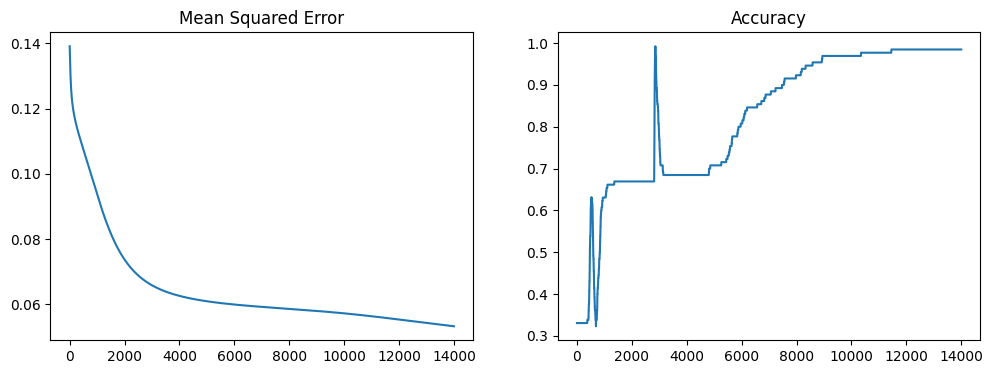

Accuracy: 0.95


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

# Load dataset
data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
# Get features and target
X = data.data
y = data.target
# Get dummy variable
y = pd.get_dummies(y).values
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)
# Initialize variables
learning_rate = 0.1
iterations = 14000
N = y_train.size
# Number of input features
input_size = 4
# Number of hidden layers neurons
hidden_size = 2
# Number of neurons at the output layer
output_size = 3
results = pd.DataFrame(columns=["mse", "accuracy"])
# Initialize weights
np.random.seed(10)
# Initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
# Initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))

for itr in range(iterations):
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results = pd.concat([results, pd.DataFrame({"mse": mse, "accuracy": acc}, index=[0])], ignore_index=True)
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1-A2)
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1-A1)

    # Weight update
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

# Plot results after training is complete
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(results["mse"])
plt.title("Mean Squared Error")

plt.subplot(1, 2, 2)
plt.plot(results["accuracy"])
plt.title("Accuracy")

plt.show()
# results.mse.plot(title = "Mean Squared Error")
# results.accuracy.plot(title="Accuracy")

# Feedforward on the test set
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))
